# Линейная регрессия

Задача прогноза вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной ошибки. Рассмотрим линейную регрессию на примере листка ириса. Будем предсказывать длину листка по его ширине.

x - ширина листа, y - длина листка.

In [2]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
data = load_iris().data
x = data[:,3]
y = data[:,2]
plt.scatter(x, y)
plt.show()

<Figure size 640x480 with 1 Axes>

Напишите функцию, которая по двум параметрам  $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:

$$Err(w_0, w_1) = \frac{1}{n}\sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$ Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных.

In [16]:
def squarErr(w0, w1):
    squarSum = .0;
    n = x.size
    for i in range(0, n):
        squarSum = squarSum + (y[i] - (w0 + w1 * x[i])) ** 2
        
    return squarSum/n

Возьмите параметры $\omega_0$ - свободный член и $\omega_1$ - наклон прямой и постройте две любые прямые, которые будут некоторым образом описывать зависимость ширины листа от его длины. Представьте графически.

квадратичное отклонение от функции 1: 2.1039333333333334


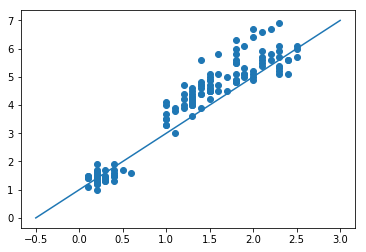

квадратичное отклонение от функциии 2: 7.645466666666669


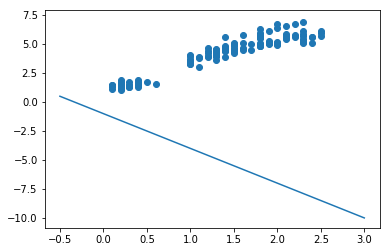

In [35]:
lineFunc = lambda x, w0, w1: w0 + w1 * x

f1 = lambda x: 1 + 2 * x
f2 = lambda x: -1 - 3 * x

print('квадратичное отклонение от функции 1:', squarErr(0, 2))
xpts = np.linspace(-0.5, 3)
test_v = np.vectorize(f1)
plt.plot(xpts, test_v(xpts))
plt.scatter(x, y)
plt.show()

print('квадратичное отклонение от функциии 2:', squarErr(0, 1))
xpts = np.linspace(-0.5, 3)
test_v = np.vectorize(f2)
plt.plot(xpts, test_v(xpts))
plt.scatter(x, y)
plt.show()

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Рассмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

Постройте график зависимости функции ошибки от параметра $w_1$ при $w_0$ = 0.

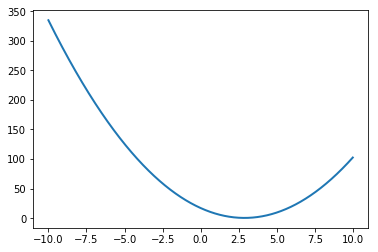

In [38]:
w1Lambda = lambda x: squarErr(0, x);

w1_deviations = np.array([[key / 100, w1Lambda(key / 100)] for key in range(-1000, 1000)])

plt.plot(w1_deviations[:,0], w1_deviations[:,1], linewidth=2.0)
plt.show()

С помощью метода minimize_scalar из scipy.optimize найдите минимум функции, определенной выше, для значений параметра  $w_1$ в диапазоне [-10,10]. Проведите на графике прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в оптимальное значение параметра $w_1$.

In [40]:
from scipy.optimize import minimize_scalar
minimize_scalar(w1Lambda, bounds=(-10, 10))

     fun: 0.5618258679809038
    nfev: 10
     nit: 4
 success: True
       x: 2.874706446598089

В связи с тем, что у нас требуется найти минимальное значение функции по $w_0$, $w_1$ следовательно функция ошибки будет находиться в трехмерном пространстве.
Пример построения трехмерных графиков находится ниже.

In [41]:
from mpl_toolkits.mplot3d import Axes3D

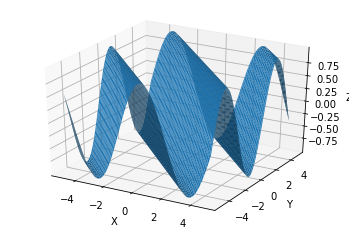

In [42]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X + Y)


surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Постройте график зависимости функции ошибки в трехмерном пространстве от параметров $\omega_0$ и $\omega_1$.

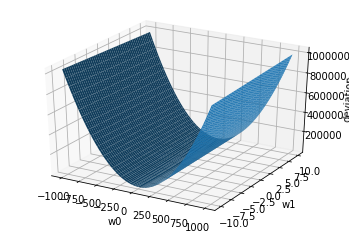

In [43]:
figire = plt.figure()
axis = figire.gca(projection='3d') # get current axis

w0 = np.arange(-1000, 1000, 10)
w1 = np.arange(-10, 10, 0.1)
w0, w1 = np.meshgrid(w0, w1)
deviation = squarErr(w0, w1)


surface = axis.plot_surface(w0, w1, deviation)
axis.set_xlabel('w0')
axis.set_ylabel('w1')
axis.set_zlabel('deviation')
plt.show()

Используя метод minimize найдите минимум функции. Диапазон поиска подберите самостоятельно. Начальная точка - (0,0). Постройте прямую на графике с данными.

w0 minimum 1.0835579584540156
w1 minimum 2.229940529146159


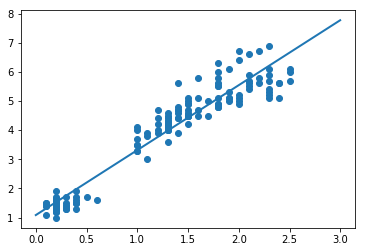

In [44]:
from scipy.optimize import minimize

def calculateSquareError(data):
    return squarErr(data[1], data[0])

[w1min, w0min] = minimize(calculateSquareError, [.0, .0], method='L-BFGS-B', bounds=([-10, 10], [-1000, 1000]))['x']

plt.scatter(x, y)

minFunc = lambda x: w0min + w1min * x;

minFuncValues = np.array([[key / 1000, minFunc(key / 1000)] for key in range(0, 3000)])

plt.plot(minFuncValues[:,0], minFuncValues[:,1], linewidth=2.0)

print('w0 minimum', w0min)
print('w1 minimum', w1min)

plt.show()

Проверьте полученные результаты аналитическим методом поиска корней СЛАУ использованным на лекции.

In [45]:
A = np.vstack([x, np.ones(len(x))]).T

m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

2.2299404951218635 1.0835580328505119


## Работу выполнил
---
Студент группы **РИМ-181226**

Кабанов Евгений Алексеевич